# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [2]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [2]:
m:int = 10
print("Układ równań gdzie A1 jest macierzą o wymiarach m x m\n")    
A1,b1 = main.random_matrix_Ab(m)
print(A1,b1)
print("\n")
print("Układ równań gdzie A1 jest macierzą diagonalnie zdominowaną o wymiarach m x m\n")
A2,b2 = main.diag_dominant_matrix_A_b(m)
print(A2,b2)
print("\n")
print("Układ równań gdzie A1 jest macierzą symetryczną o wymiarach m x m")
A3,b3 = main.symmetric_matrix_A_b(m)
print(A3,b3)

Układ równań gdzie A1 jest macierzą o wymiarach m x m

[[7 3 2 4 6 6 9 8 7 9]
 [7 2 0 9 4 1 6 4 4 8]
 [3 3 5 3 4 2 9 3 0 6]
 [8 7 6 6 2 6 9 9 0 1]
 [6 2 5 7 8 9 7 5 3 3]
 [6 9 1 8 1 8 9 5 5 5]
 [4 3 3 2 8 1 8 0 6 7]
 [8 8 0 8 5 2 7 7 2 8]
 [6 1 6 7 0 3 8 4 3 6]
 [7 4 4 0 2 7 3 0 2 4]] [7 8 3 4 7 8 1 1 2 0]


Układ równań gdzie A1 jest macierzą diagonalnie zdominowaną o wymiarach m x m

[[1101   59   53   50   47   87   34   72   67   39]
 [  77 1106   41   56    2   59   64   11   79   49]
 [  25    9  831   64   31   45   31   14   63   38]
 [  50   18   33  927   79   20   64    6   92   26]
 [   8   41   98   13  617    6   86    1   59   18]
 [  78   35   12   47   43 1046   33   63   70   99]
 [   8   52   90   24   37   59 1034   47   60   80]
 [  29   98   13   75    8   49   26  869   44   10]
 [  38   13   96   86   19    4   37   99 1365   96]
 [  88   85   18   19   15   93    4    0   58  985]] [72 91 71  6 54 45 26 79 92 19]


Układ równań gdzie A1 jest macierzą symetryczn

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

The slowest run took 28.82 times longer than the fastest. This could mean that an intermediate result is being cached.
114 µs ± 142 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
77.5 µs ± 25.9 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
232 µs ± 50 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
The slowest run took 5.67 times longer than the fastest. This could mean that an intermediate result is being cached.
914 µs ± 655 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
23 µs ± 1.2 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
147 µs ± 8.09 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
The slowest run took 5.46 times longer than the fastest. This could mean that an intermediate result is being cached.
520 µs ± 384 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
833 µs ± 367 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
22.8 µs ± 1.48 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
The slowest 

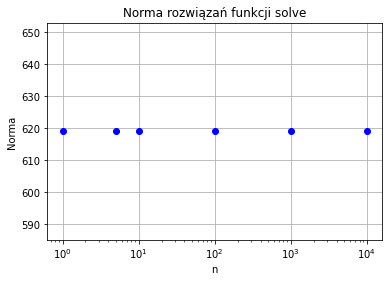

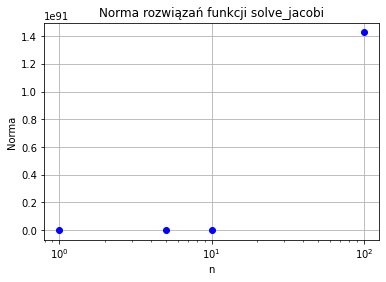

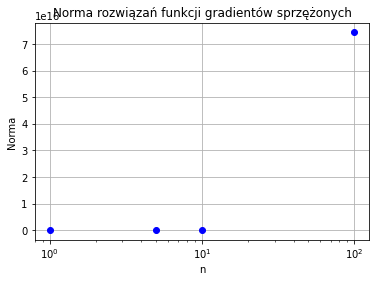

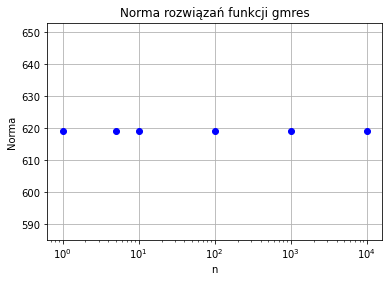

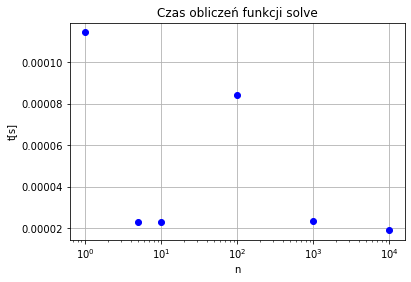

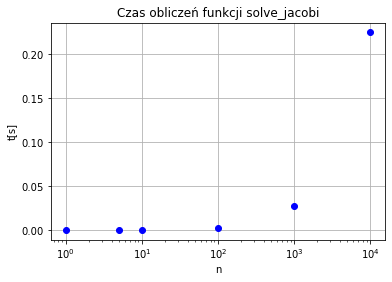

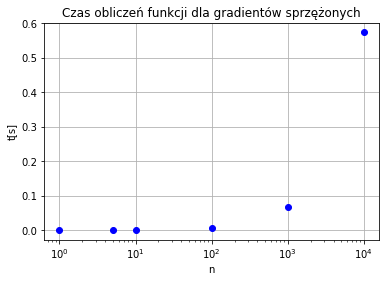

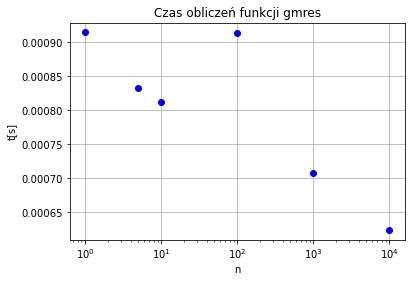

In [3]:
#Definicje stałych i zmienncyh
#------------------------------------------------
n = [1,5,10,100,1000,10000]
x1_solve = np.linalg.solve(A1,b1)
x_init = np.zeros(10)
x1_jacobi, x_it = main.solve_jacobi(A1,b1,x_init)
x1_grad,info = sp.sparse.linalg.cg(A1,b1) #gradienty sprzężone
x1_gmres,info1 = sp.sparse.linalg.gmres(A1,b1)

norm_solve = []
norm_jacobi = []
norm_grad = []
norm_gmres = []
time_solve = []
time_jacobi = []
time_grad = []
time_gmres = []

for i in n:
    saved_timing = %timeit -r 20 -n 20 -o np.linalg.solve(A1,b1)
    time_solve.append(saved_timing.average)
    x1_solve = np.linalg.solve(A1,b1)
    norm_solve.append(main.residual_norm(A1,b1,x1_solve))
    
    saved_timing = %timeit -r 20 -n 20 -o main.solve_jacobi(A1,b1,x_init,maxiter=i)
    time_jacobi.append(saved_timing.average)
    x_init = np.zeros(10)
    x1_jacobi,x_it = main.solve_jacobi(A1,b1,x_init,maxiter=i)
    norm_jacobi.append(main.residual_norm(A1,b1,x1_jacobi))
    
    saved_timing = %timeit -r 20 -n 20 -o sp.sparse.linalg.cg(A1,b1,maxiter=i)
    time_grad.append(saved_timing.average)
    x1_grad,info = sp.sparse.linalg.cg(A1,b1,maxiter=i)
    norm_grad.append(main.residual_norm(A1,b1,x1_grad))
    
    saved_timing = %timeit -r 20 -n 20 -o sp.sparse.linalg.gmres(A1,b1,maxiter=i)
    time_gmres.append(saved_timing.average)
    x1_gmres,info1 = sp.sparse.linalg.gmres(A1,b1,maxiter=i)
    norm_gmres.append(main.residual_norm(A1,b1,x1_gmres))
    
#Przedstawienie wyników na wykresach
#-------------------------------------------------
plt.figure()
plt.semilogx(n,norm_solve,'bo')
plt.title("Norma rozwiązań funkcji solve")
plt.xlabel('n')
plt.ylabel("Norma")
plt.grid()

plt.figure()
plt.semilogx(n,norm_jacobi,'bo')
plt.title("Norma rozwiązań funkcji solve_jacobi")
plt.xlabel('n')
plt.ylabel("Norma")
plt.grid()

plt.figure()
plt.semilogx(n,norm_grad,'bo')
plt.title("Norma rozwiązań funkcji gradientów sprzężonych")
plt.xlabel('n')
plt.ylabel("Norma")
plt.grid()

plt.figure()
plt.semilogx(n,norm_gmres,'bo')
plt.title("Norma rozwiązań funkcji gmres")
plt.xlabel('n')
plt.ylabel("Norma")
plt.grid()

plt.figure()
plt.semilogx(n,time_solve,'bo')
plt.title("Czas obliczeń funkcji solve")
plt.xlabel('n')
plt.ylabel("t[s]")
plt.grid()

plt.figure()
plt.semilogx(n,time_jacobi,'bo')
plt.title("Czas obliczeń funkcji solve_jacobi")
plt.xlabel('n')
plt.ylabel("t[s]")
plt.grid()

plt.figure()
plt.semilogx(n,time_grad,'bo')
plt.title("Czas obliczeń funkcji dla gradientów sprzężonych")
plt.xlabel('n')
plt.ylabel("t[s]")
plt.grid()

plt.figure()
plt.semilogx(n,time_gmres,'bo')
plt.title("Czas obliczeń funkcji gmres")
plt.xlabel('n')
plt.ylabel("t[s]")
plt.grid()



Dodatkowo można stwiedzić, że nasza Macierz nie spełnia watunków iteracji Jakobiego ponieważ nie jest diagonalnie dominująca

In [7]:
A1,b1 = main.random_matrix_Ab(10)
if main.is_diag_dominant(A1):
    iter_num  = np.arange(1, 100, 1)
    x_init = np.zeros((m, 1))
    norm_jacobi = []
    for it in iter_num:
        x1_jacobi, x_it = main.solve_jacobi(A1, b1, x_init, maxiter=it)
        norm_jacobi.append(main.residual_norm(A1, x1_jacobi, b1))
    plt.scatter(iter_num, norm_jacobi)
    plt.show()
else:
    print("Nie można zastosować takiej metody")

Nie można zastosować takiej metody


Dla metody iteracji gradientów sprzężonych również nasza macierz nie spełnia warunków ponieważ nie jest symetryczna i dodatnio określona

In [15]:

if main.is_symmetric(A1) and np.all(np.linalg.eigvals(A1) > 0):
    print('Można zastosować metodę iteracji gradientów sprzężonych')
else:
    print("Nie można zastosować takiej metody")  

Nie można zastosować takiej metody


***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

22.1 µs ± 799 ns per loop (mean ± std. dev. of 20 runs, 20 loops each)
62.7 µs ± 15 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
213 µs ± 18.7 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
532 µs ± 41.9 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
22.9 µs ± 2.86 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
150 µs ± 8.22 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
428 µs ± 28.5 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
530 µs ± 25.6 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
23.3 µs ± 9.27 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
263 µs ± 21 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
703 µs ± 79.9 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
505 µs ± 34.1 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
21.5 µs ± 4.82 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
488 µs ± 30.8 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
678 µs

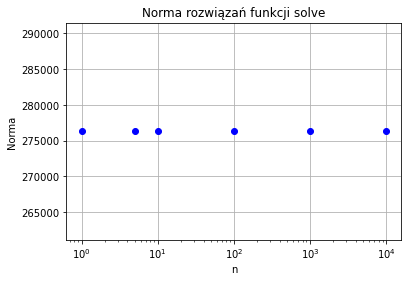

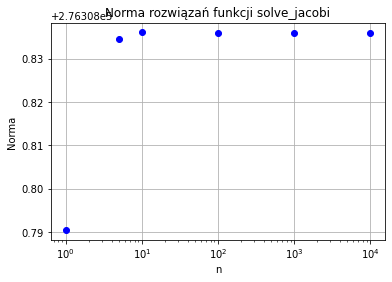

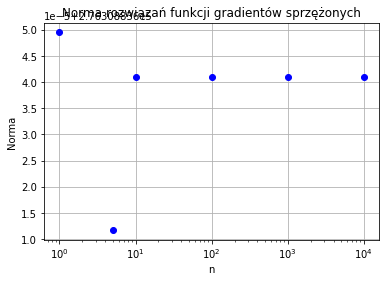

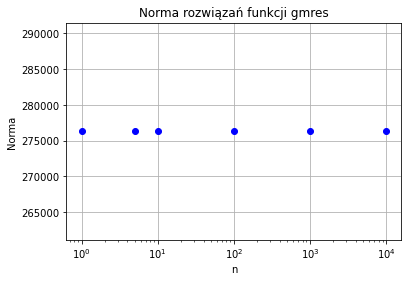

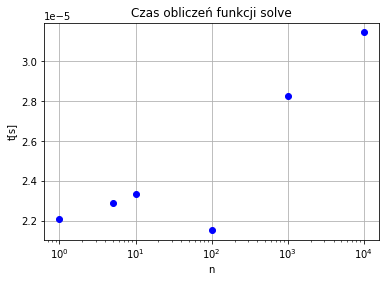

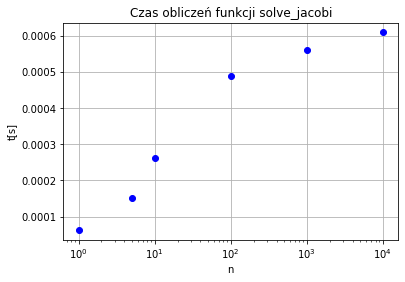

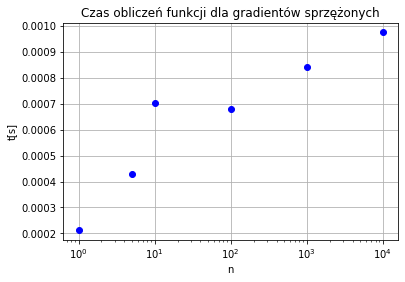

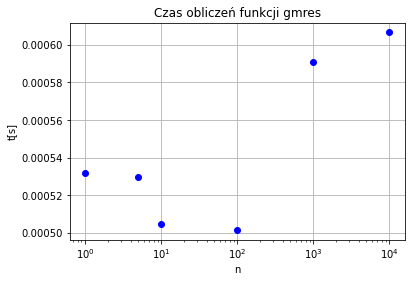

In [4]:
#Definicje stałych i zmienncyh
#------------------------------------------------
n = [1,5,10,100,1000,10000]
x2_solve = np.linalg.solve(A2,b2)
x_init = np.zeros(10)
x2_jacobi, x_it = main.solve_jacobi(A2,b2,x_init)
x2_grad,info = sp.sparse.linalg.cg(A2,b2) #gradienty sprzężone
x2_gmres,info1 = sp.sparse.linalg.gmres(A2,b2)

norm_solve = []
norm_jacobi = []
norm_grad = []
norm_gmres = []
time_solve = []
time_jacobi = []
time_grad = []
time_gmres = []

for i in n:
    saved_timing = %timeit -r 20 -n 20 -o np.linalg.solve(A2,b2)
    time_solve.append(saved_timing.average)
    x1_solve = np.linalg.solve(A2,b2)
    norm_solve.append(main.residual_norm(A2,b2,x2_solve))
    
    saved_timing = %timeit -r 20 -n 20 -o main.solve_jacobi(A2,b2,x_init,maxiter=i)
    time_jacobi.append(saved_timing.average)
    x_init = np.zeros(10)
    x2_jacobi,x_it = main.solve_jacobi(A2,b2,x_init,maxiter=i)
    norm_jacobi.append(main.residual_norm(A2,b2,x2_jacobi))
    
    saved_timing = %timeit -r 20 -n 20 -o sp.sparse.linalg.cg(A2,b2,maxiter=i)
    time_grad.append(saved_timing.average)
    x2_grad,info = sp.sparse.linalg.cg(A2,b2,maxiter=i)
    norm_grad.append(main.residual_norm(A2,b2,x2_grad))
    
    saved_timing = %timeit -r 20 -n 20 -o sp.sparse.linalg.gmres(A2,b2,maxiter=i)
    time_gmres.append(saved_timing.average)
    x2_gmres,info1 = sp.sparse.linalg.gmres(A2,b2,maxiter=i)
    norm_gmres.append(main.residual_norm(A2,b2,x2_gmres))
    
#Przedstawienie wyników na wykresach
#-------------------------------------------------
plt.figure()
plt.semilogx(n,norm_solve,'bo')
plt.title("Norma rozwiązań funkcji solve")
plt.xlabel('n')
plt.ylabel("Norma")
plt.grid()

plt.figure()
plt.semilogx(n,norm_jacobi,'bo')
plt.title("Norma rozwiązań funkcji solve_jacobi")
plt.xlabel('n')
plt.ylabel("Norma")
plt.grid()

plt.figure()
plt.semilogx(n,norm_grad,'bo')
plt.title("Norma rozwiązań funkcji gradientów sprzężonych")
plt.xlabel('n')
plt.ylabel("Norma")
plt.grid()

plt.figure()
plt.semilogx(n,norm_gmres,'bo')
plt.title("Norma rozwiązań funkcji gmres")
plt.xlabel('n')
plt.ylabel("Norma")
plt.grid()

plt.figure()
plt.semilogx(n,time_solve,'bo')
plt.title("Czas obliczeń funkcji solve")
plt.xlabel('n')
plt.ylabel("t[s]")
plt.grid()

plt.figure()
plt.semilogx(n,time_jacobi,'bo')
plt.title("Czas obliczeń funkcji solve_jacobi")
plt.xlabel('n')
plt.ylabel("t[s]")
plt.grid()

plt.figure()
plt.semilogx(n,time_grad,'bo')
plt.title("Czas obliczeń funkcji dla gradientów sprzężonych")
plt.xlabel('n')
plt.ylabel("t[s]")
plt.grid()

plt.figure()
plt.semilogx(n,time_gmres,'bo')
plt.title("Czas obliczeń funkcji gmres")
plt.xlabel('n')
plt.ylabel("t[s]")
plt.grid()

Możemy stwierdzić, że Macierz nie spełnia warunków metody iteracji gradientów sprzężonych ponieważ nie jest symetryczna oraz dodatnio określona

In [24]:
A2, b2 = main.diag_dominant_matrix_A_b(10)
if main.is_symmetric(A2) and np.all(np.linalg.eigvals(A2) < 0):
    print("Można stosować metodę iteracji gradientów sprzężonych")
    pass
else:
    print("Nie można zastosować takiej metody")

Nie można zastosować takiej metody


***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

C:\Users\48693\Documents\GitHub\laboratorium-8-Wiktor010\main.py:115: RuntimeWarning: divide by zero encountered in true_divide
  D_inv = np.diag(1/np.diag(D))


28.3 µs ± 6.55 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
63.7 µs ± 7.2 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
207 µs ± 23.9 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
787 µs ± 135 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
25.6 µs ± 8.38 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
194 µs ± 51.6 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
579 µs ± 96.9 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
883 µs ± 388 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
29 µs ± 8.04 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
275 µs ± 37.9 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
735 µs ± 83.8 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
985 µs ± 339 µs per loop (mean ± std. dev. of 20 runs, 20 loops each)
The slowest run took 6.74 times longer than the fastest. This could mean that an intermediate result is being cached.
59.9 µs ± 30 µs per loop (mean ±

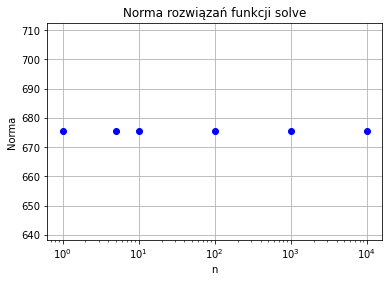

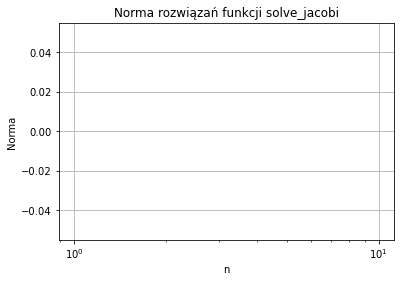

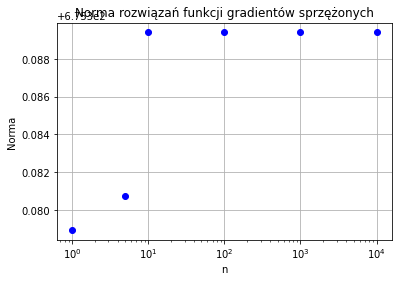

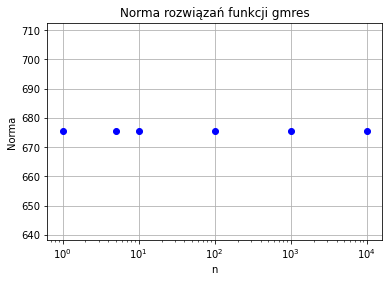

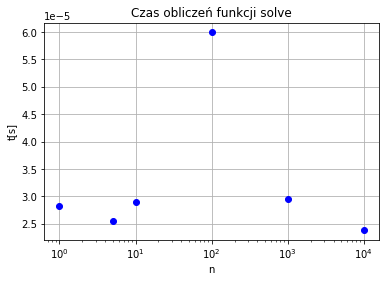

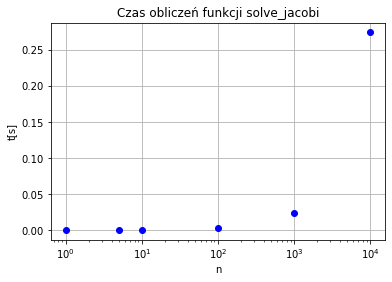

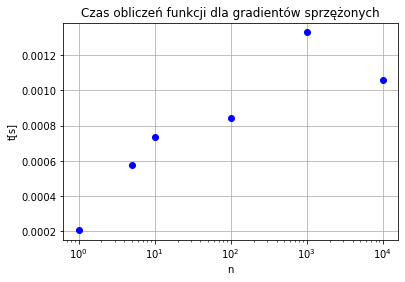

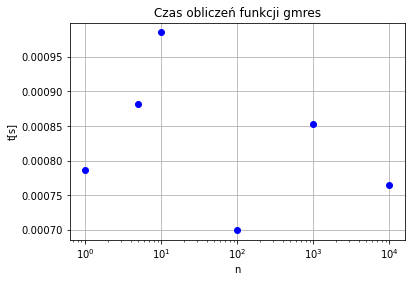

In [5]:
#Definicje stałych i zmienncyh
#------------------------------------------------
n = [1,5,10,100,1000,10000]
x3_solve = np.linalg.solve(A3,b3)
x_init = np.zeros(10)
x3_jacobi, x_it = main.solve_jacobi(A3,b3,x_init)
x3_grad,info = sp.sparse.linalg.cg(A3,b3) #gradienty sprzężone
x3_gmres,info1 = sp.sparse.linalg.gmres(A3,b3)

norm_solve = []
norm_jacobi = []
norm_grad = []
norm_gmres = []
time_solve = []
time_jacobi = []
time_grad = []
time_gmres = []

for i in n:
    saved_timing = %timeit -r 20 -n 20 -o np.linalg.solve(A1,b1)
    time_solve.append(saved_timing.average)
    x3_solve = np.linalg.solve(A3,b3)
    norm_solve.append(main.residual_norm(A3,b3,x3_solve))
    
    saved_timing = %timeit -r 20 -n 20 -o main.solve_jacobi(A3,b3,x_init,maxiter=i)
    time_jacobi.append(saved_timing.average)
    x_init = np.zeros(10)
    x3_jacobi,x_it = main.solve_jacobi(A3,b3,x_init,maxiter=i)
    norm_jacobi.append(main.residual_norm(A3,b3,x3_jacobi))
    
    saved_timing = %timeit -r 20 -n 20 -o sp.sparse.linalg.cg(A3,b3,maxiter=i)
    time_grad.append(saved_timing.average)
    x3_grad,info = sp.sparse.linalg.cg(A3,b3,maxiter=i)
    norm_grad.append(main.residual_norm(A3,b3,x3_grad))
    
    saved_timing = %timeit -r 20 -n 20 -o sp.sparse.linalg.gmres(A3,b3,maxiter=i)
    time_gmres.append(saved_timing.average)
    x3_gmres,info1 = sp.sparse.linalg.gmres(A3,b3,maxiter=i)
    norm_gmres.append(main.residual_norm(A3,b3,x3_gmres))
    
#Przedstawienie wyników na wykresach
#-------------------------------------------------
plt.figure()
plt.semilogx(n,norm_solve,'bo')
plt.title("Norma rozwiązań funkcji solve")
plt.xlabel('n')
plt.ylabel("Norma")
plt.grid()

plt.figure()
plt.semilogx(n,norm_jacobi,'bo')
plt.title("Norma rozwiązań funkcji solve_jacobi")
plt.xlabel('n')
plt.ylabel("Norma")
plt.grid()

plt.figure()
plt.semilogx(n,norm_grad,'bo')
plt.title("Norma rozwiązań funkcji gradientów sprzężonych")
plt.xlabel('n')
plt.ylabel("Norma")
plt.grid()

plt.figure()
plt.semilogx(n,norm_gmres,'bo')
plt.title("Norma rozwiązań funkcji gmres")
plt.xlabel('n')
plt.ylabel("Norma")
plt.grid()

plt.figure()
plt.semilogx(n,time_solve,'bo')
plt.title("Czas obliczeń funkcji solve")
plt.xlabel('n')
plt.ylabel("t[s]")
plt.grid()

plt.figure()
plt.semilogx(n,time_jacobi,'bo')
plt.title("Czas obliczeń funkcji solve_jacobi")
plt.xlabel('n')
plt.ylabel("t[s]")
plt.grid()

plt.figure()
plt.semilogx(n,time_grad,'bo')
plt.title("Czas obliczeń funkcji dla gradientów sprzężonych")
plt.xlabel('n')
plt.ylabel("t[s]")
plt.grid()

plt.figure()
plt.semilogx(n,time_gmres,'bo')
plt.title("Czas obliczeń funkcji gmres")
plt.xlabel('n')
plt.ylabel("t[s]")
plt.grid()

Macierz A3 nie jest diagonalnie dominująca dlatego nie spełnia warunków iteracji Jakobiego.

In [26]:
A3, b3 = main.symmetric_matrix_A_b(10)
if main.is_diag_dominant(A3):
    pass
else:
    print("Nie można zastosować takiej metody")

Nie można zastosować takiej metody


**WNIOSKI**  
Ćwiczenia te pozwoliły mi zapoznać się z iteracyjnymi metodami rozwiązywaniami układów równań liniowych. Metody te mają mniejszą złożoność obliczeniową niż metody dokładne. Jest to algorytm, który uzyskuje wynik poprzez iterację, czyli powtarzanie danej operacji z góry określoną liczbę razy lub aż do spełnienia określonego warunku. W pierwszych dwóch zadanich musieliśmy zdefiniować funkcje, które sprawdzają czy dana macierz jest symetryczna oraz diagonalnie zdominowaną. W zadaniu 4 należało zaimplementować iteracyjną metodę solve_jacobi, rozwiązującą układ równań metodą Jacobiego. Metoda ta polega na rozłożeniu macierzy na trzy macierze 
A = L+D+U, gdzie L to macierz trójkątna dolna z zerami na diagonali, D to macierz diagonalna, U macierz trójkątna górna z zerami na diagonali. Zapisujemy ją w postaci (L+D+U)x =b, macierz D jest diagonalna nieosobliwa, którą łatwo odwrócić.Ostatecznie otrzymujemy wzór na M_j=-D^-1*(L+U).Warunkiem koniecznym i wystarczającym zbieżności metod iteracji prostej jest p(M) < 1. Gdzie p(M) to promień spektralny Macierzy M. Kolejne trzy zadania to rozwiązynie układów równań czterema metodami dla poszczególnych macierzy. Niektórych metod niestety nie możemy zastosować ponieważ nie są diagonalnie dominujące(metoda Jacobiego). Jeżeli macierz nie jest symetryczna oraz dodatnio określona nie możemy zastosować metody gradientów sprzężonych. Macierze dodatnio określone odgrywają dużą rolę ponieważ występują w układach mechanicznych, elektrycznych oraz w analizie energii układów.Metoda gradientów sprzężonych polega na tym, aby tak dobierać kierunki poszukiwania, aby zbliżać się do rozwiązania jak przy macierzy diagonalnej(minimalizacja formy kwadratowej). Można tego dokonać zmieniając zmienne, ale czasami wporwadza to duże utrudnienia obliczeniowe. Algorytm GMRES jest to metoda najmniejszego residuum. W n tym kroku szukamy aproksymacji rozwiązania równania za pomocą wektora xn ∈ Kn minmalizując normę residuum rn = b − Axn. Najwyższą dokładność obliczeń uzyskałem przy użyciu funkcji solve_jacobi oraz gradientów sprzężonych pakietu scipy. Są one przy tym dość wydajne czasowo. Najbardziej wydajną czasowo metodą okazała się funkcja gmres jednak nie tak dokładną.


Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)